### Testing of the code during development

Looking at the M1-1 dataset

In [1]:
import os
import glob
from oyv.imports import *
import importlib

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [2]:
%matplotlib inline

In [3]:
os.chdir('/home/oyvindl/work/code/git_public/sigpyproc/testing/development/')

In [106]:
# Load the modules
os.chdir('../../')
from sigpyproc import sig_funcs, sig_append, sig_calc
os.chdir('testing/development/')

In [5]:
# Load converted data from M1-1
floc = '/media/oyvindl/ratatosk/data/mooring_data/signature500/m1_1/converted/*'
flist = glob.glob(floc)
for fn in flist:
    if '_avgd' in fn:
        flist.remove(fn)

In [203]:
# RELOAD the sig_func module
#os.chdir('../../')
importlib.reload(sig_funcs)
importlib.reload(sig_append)
importlib.reload(sig_calc)

#os.chdir('testing/development/')

<module 'sigpyproc.sig_calc' from '/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_calc.py'>

In [122]:
DX = sig_funcs.matfiles_to_dataset(flist[:2], )

/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_append.py:248: RuntimeWarning: invalid value encountered in sqrt
  180 / np.pi* np.arccos(np.sqrt(
/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_append.py:257: RuntimeWarning: invalid value encountered in sqrt
  180 / np.pi* np.arccos(np.sqrt(


170640 time points, 3555 ensembles. Sample per ensemble: 48
Done. Run sig_funcs.overview() to print some additional details.


###### Append msl


In [123]:
dmsl = pickle_load('CARRA_MSL_M1_temp.p')

In [124]:
dmsl.keys()

dict_keys(['MSL', 'time'])

In [125]:
DX = sig_append.append_atm_pres(DX, dmsl.MSL, dmsl.time)

In [176]:
dctd = pickle_load('CARRA_CTD_M1_1_temp.p')

In [177]:
DX = sig_append.set_lon(DX, 30)

In [182]:
DX = sig_append.append_ctd(DX, dctd.TEMP, dctd.SP, dctd.pres, dctd.time)

(17810.0, 17820.0)

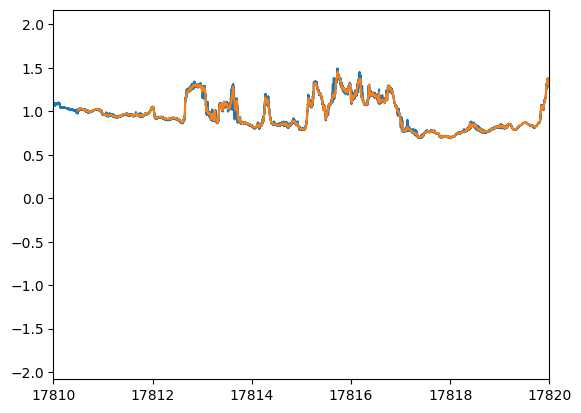

In [183]:
fig, ax = plt.subplots()
ax.plot(dctd.time, dctd.TEMP)
ax.plot(DX.TIME, DX.CT_CTD)
ax.set_xlim(17810, 17820)

In [ ]:
os.chdir('/home/oyvindl/work/code/git_public/sigpyproc/testing/development/')

In [40]:
# Load the modules
os.chdir('../../')
from sigpyproc import sig_calc#, sig_append_external
os.chdir('testing/development/')

In [210]:
importlib.reload(sig_calc)
#importlib.reload(sig_calc)
importlib.reload(sig_draft)


<module 'sigpyproc.sig_draft' from '/home/oyvindl/work/code/git_public/sigpyproc/sigpyproc/sig_draft.py'>

In [129]:
DX = sig_append.set_lat(DX, 80)

In [191]:
DX = sig_calc.dep_from_p(DX)

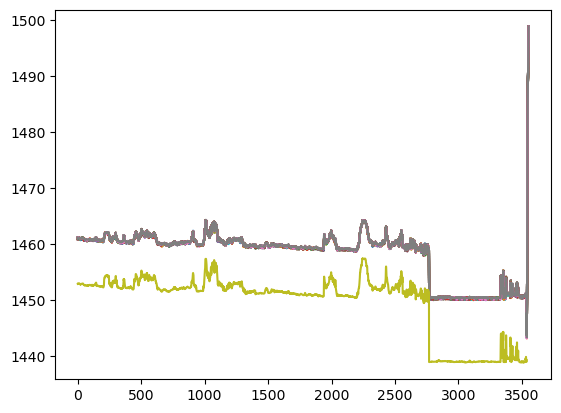

In [211]:
fig, ax = plt.subplots()
ax.plot(DX.Average_Soundspeed.data)
ax.plot(DX.sound_speed_CTD.data)

In [212]:
DX = sig_draft.calculate_draft(DX)

/home/oyvindl/anaconda3/envs/oyv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [213]:
DX.SURFACE_DEPTH

<xarray.DataArray 'SURFACE_DEPTH' (TIME: 3555, ENSEMBLE: 48)>
array([[ 0.12593004,  0.44179098, -0.46907176, ..., -0.13079338,
         0.18930925, -0.05598991],
       [ 0.11915879,  0.16473257, -0.1301709 , ..., -0.24716692,
         0.08564906,  0.54993512],
       [-0.92979253, -0.19139708,  0.40887138, ..., -0.25085218,
         0.34528367,  0.16612841],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * TIME     (TIME) float64 1.781e+04 1.781e+04 ... 1.822e+04 1.822e+04
Dimensions without coordinates: ENSEMBLE
Attributes:
    long_name:  Depth of the scattering surface observed by the Altimeter
    units:      m
    note:       From AST altimeter distances.\n\nComputed with the function s...

(array([ 5., 43., 44., 34., 30., 67., 77., 65., 42., 45., 40., 25., 33.,
        24., 10., 19., 10.,  6., 12., 13.,  7.,  4.,  7.,  1.,  0.,  6.,
         3.,  2.,  3.,  1.,  5.,  2.,  3.,  1.,  4.,  4.,  5.,  1.,  1.,
         4.,  1.,  2.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  2.,  0.,  0.,  1.,  2.,  1.,  1.,  3.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.01378903,  0.0271145 ,  0.06801803,  0.10892157,  0.1498251 ,
         0.19072863,  0.23163216,  0.27253569,  0.31343923,  0.35434276,
         0.39524629,  0.43614982,  0.47705335,  0.51795689,  0.55886042,
         0.59976395,  0.64066748,  0.68157102,  0.72247455,  0.76337808,
         0.80428161,  0.84518514,  0.88608868,  0.92699221,  0.96789574,
         1.00879927,  1.0497028 ,  1.09060634,  1.13150987,  1.172413

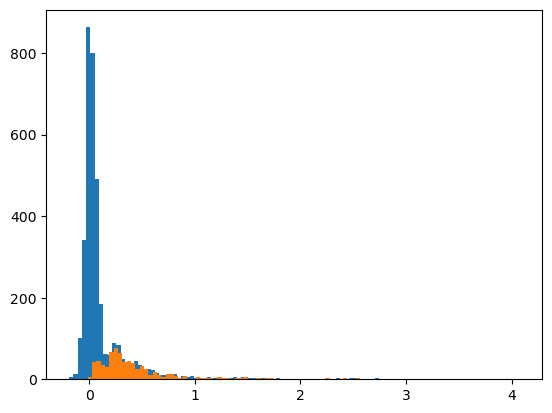

In [214]:
fig, ax = plt.subplots()
ax.hist(DX.SURFACE_DEPTH.mean(axis = 1), 100)
ax.hist(DX.SEA_ICE_DRAFT_MEDIAN, 100)


In [215]:
DX.sound_speed_CTD

<xarray.DataArray 'sound_speed_CTD' (TIME: 3555)>
array([1452.91000232, 1452.91842873, 1452.98353269, ...,           nan,
                 nan,           nan])
Coordinates:
  * TIME     (TIME) float64 1.781e+04 1.781e+04 ... 1.822e+04 1.822e+04
Attributes:
    long_name:               Sound speed
    units:                   m s-1
    Instrument description:  None
    Instrument SN:           None
    note:                    Calculated using the gsw module. Linearly interp...

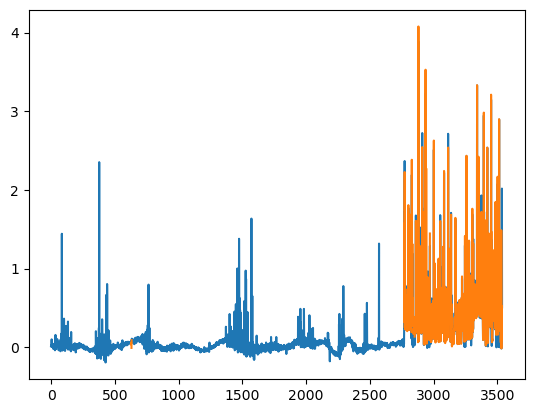

In [216]:
fig, ax = plt.subplots()
ax.plot(DX.SURFACE_DEPTH.mean(axis = 1))
ax.plot(DX.SEA_ICE_DRAFT_MEDIAN)

In [88]:
DX = sig_draft.calculate_surface_position(DX)

In [90]:
DX.Average_AltimeterDistanceAST

<xarray.DataArray 'Average_AltimeterDistanceAST' (TIME: 3555, SAMPLE: 48)>
array([[20.302954  , 19.976751  , 20.88669   , ..., 20.559713  ,
        20.234442  , 20.470144  ],
       [20.305473  , 20.24968   , 20.55375   , ..., 20.718475  ,
        20.367237  , 19.898516  ],
       [21.45017   , 20.672514  , 20.015337  , ..., 20.71852   ,
        20.08733   , 20.251133  ],
       ...,
       [ 0.5513362 ,  0.55310076,  0.55430025, ...,  0.5546465 ,
         0.55070555,  0.55858815],
       [ 0.5527211 ,  0.5442152 ,  0.5442306 , ...,  0.54832923,
         0.5507394 ,  0.5452383 ],
       [ 0.54580766,  0.546404  ,  0.5489835 , ...,  0.5436946 ,
         0.543467  ,  0.5442937 ]], dtype=float32)
Coordinates:
  * TIME     (TIME) float64 1.781e+04 1.781e+04 ... 1.822e+04 1.822e+04
  * SAMPLE   (SAMPLE) int64 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48

In [93]:
DX.ICE_IN_SAMPLE

<xarray.DataArray 'ICE_IN_SAMPLE' (TIME: 3555, SAMPLE: 48)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * TIME     (TIME) float64 1.781e+04 1.781e+04 ... 1.822e+04 1.822e+04
  * SAMPLE   (SAMPLE) int64 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48
Attributes:
    long_name:  Identification of sea ice in sample (conservative estimate)
    desc:       Binary classification (ice/not ice), where "ice" is when FOM ...

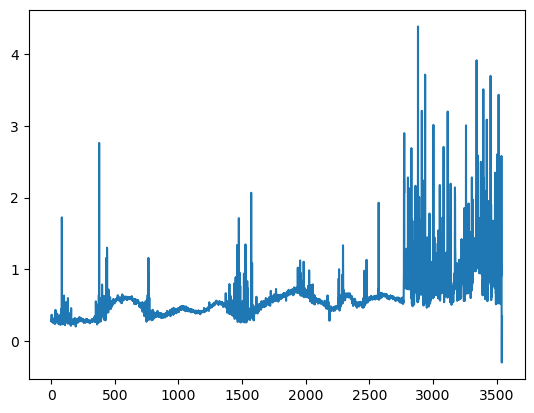

In [92]:
fig, ax = plt.subplots()
ax.plot(DX.SURFACE_DEPTH.mean(axis = 1))

In [44]:
DX.g

<xarray.DataArray 'g' ()>
array(9.83061582)
Attributes:
    units:    ms-2
    note:     Calculated using gsw.grav() for p=0 and lat=80.00

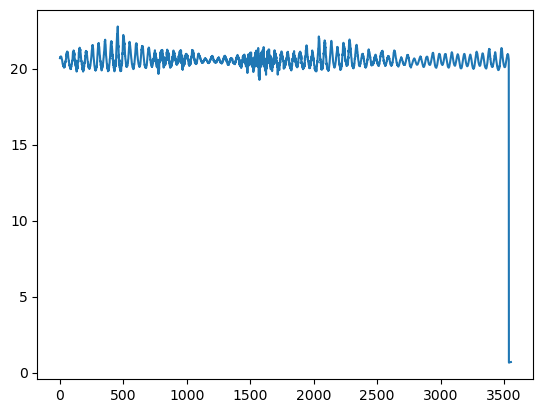

In [43]:
fig, ax = plt.subplots()
ax.plot(DX.depth[:, 0])

In [ ]:
DX.ICE_IN_SAMPLE

In [ ]:
fig, ax = plt.subplots(figsize = (16, 3))
ax.plot(rs(DX.SIC_FOM, 71).mean)
ax.plot(rs(DX.SIC_FOM_ALT, 71).mean, ':', alpha = 0.8)

In [ ]:
DX.SIC_FOM

In [ ]:
DX.lat

In [ ]:
imp.reload(sig_append)

In [ ]:
sig_append.lat(DX, 2)

In [ ]:
DX.var

In [ ]:
DX.SIC_FOM_ALT

In [ ]:
DX.sampling_interval_sec

In [ ]:
DX.Plan_ProfileInterval/60

In [ ]:
## Print some stuff with the overview() function
sig_funcs.overview(DX)

In [ ]:
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterPressure[:, 0])
ax.plot(DX.Average_Pressure[:, 0])
ax.set_ylim()

In [ ]:
DX.A

In [ ]:
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterPressure[:, 0]-DX.Average_Pressure[:, 0])

In [ ]:
DX.attrs

In [ ]:
ca()

In [ ]:
DX.Average_AltimeterDistanceAST

In [ ]:
nn = int(np.random.rand()*DX.dims['TIME'])
print(nn)
fig, ax = plt.subplots()
ax.plot(DX.Average_AltimeterDistanceAST[nn, :])

In [ ]:
fig, ax = plt.subplots()
ax.hist(DX.Average_AltimeterQualityAST.to_numpy().flatten(), 100)

In [ ]:
DX

### Check that the time looks reasonable

In [ ]:
DX.dims['TIME']

In [ ]:
fig, ax = plt.subplots()
ax.plot(DX['TIME'])

In [ ]:
from matplotlib.dates import num2date 

In [ ]:
def overview(DX):
    '''
    Prints some basic information about the dataset.
    '''

    # Time range
    datefmt = '%d %b %Y %H:%M'
    starttime = num2date(DX.TIME[0]).strftime(datefmt)
    endtime = num2date(DX.TIME[-1]).strftime(datefmt)
    ndays = DX.TIME[-1]-DX.TIME[0]

    print('\nTIME RANGE:\n%s  -->  %s  (%.1f days)'%(
        starttime, endtime, ndays))

    # Size
    print('\nSIZE:\nTotal %i time points.'%(DX.dims['TIME']*DX.dims['SAMPLE']))
    print('Split into %i ensembles with %i sample per ensemble.'%(
          DX.dims['TIME'], DX.dims['SAMPLE']))
    print('Ocean velocity bins: %i.'%(DX.dims['bins']))

In [ ]:
#### Have a look at the altimeter record

In [ ]:
DX.caonf

In [ ]:
overview(DX)

In [ ]:
num2date(DX.TIME[0])

In [ ]:
DX = sig_funcs.matfiles_to_dataset(flist, reshape = False)

In [ ]:
DXX = sig_funcs.reshape_ensembles(DX)

In [ ]:
os.chdir('../testing/basic_test/')

In [ ]:
ls

In [ ]:
DX

In [ ]:
mean_FOM = DX[nm].mean(axis = 1)


In [ ]:
sl = slice(None, None, 100)
fig, ax = plt.subplots(4, 1, sharex = True, sharey = True)
for nn in np.arange(1, 5):
    nm = 'AverageIce_FOMBeam%i'%nn
    mean_FOM = DX[nm].mean(axis = 1)
    ax[nn-1].hist(mean_FOM/ mean_FOM.max(), 25, alpha = 0.8, )

In [ ]:
sl = slice(None, None, 100)
fig, ax = plt.subplots()
for nn in np.arange(1, 5):
    nm = 'AverageIce_FOMBeam%i'%nn
    ax.plot(DX[nm].to_numpy().flatten()[sl]/ DX[nm].to_numpy().flatten()[sl].max()+(nn-1)*1.1, 'o', alpha = 0.1)

In [ ]:
sl = slice(10000, 10100)
fig, ax = plt.subplots()
ax.hist(DX.AverageIce_FOMBeam1.to_numpy().flatten(), 1000)

In [ ]:
ice_class_FOM(DX, threshold = 500)

In [ ]:
sl = slice(10000, 10100)
fig, ax = plt.subplots()
ax.plot(DX.to_array())

In [ ]:
def ice_class_from_FOM(DX, FOM_thr = 300)